# Project 4: Wrangle and Analyze Data Part 1: Gathering, Assessing, Cleaning
## Introduction

__Your tasks in this project are as follows:__

Data wrangling, which consists of:
  * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
  * Assessing data
  * Cleaning data
  * Storing, analyzing, and visualizing your wrangled data
  * Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


__Key points to keep in mind when data wrangling for this project:__

  * You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
  * Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
  * Cleaning includes merging individual pieces of data according to the rules of tidy data.
  * The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
  * You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


## Environment Preparation

In [596]:
import pandas as pd
import numpy as np
import getapi
import json
import tweepy
import requests
import sys
import re
import matplotlib
import matplotlib.pyplot as plt

if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
%matplotlib inline

## Data Gathering
### Open We Rate Dogs Archive

In [107]:
wrd_df = pd.read_csv("twitter-archive-enhanced.csv")

### Download and process associated twitter stats
For having the __Retweet Counts__ and the __Favourite Counts__ for each entry in the __twitter-archive-enhanced.csv__. I will download the whole Twitter API stats by using the Tweet ID. As the Twitter API allows only a certain amount of requests per time it will take a while. Moreover I will collect in the variable __missing__ the Tweet ID's for which it wasn't possible to retrieve any additional information.


In [ ]:
file_name="tweet_json.txt"
missing = []

api = getapi.get_twitter_api()

with open(file_name,mode="w") as file:
    for tid in wrd_df['tweet_id']:
        try:
            output = api.get_status(tid)
        except tweepy.TweepError as e:
            print(str(tid)+":"+str(e))
            missing.append(tid)
        file.write(json.dumps(output._json)+"\n")

888202515573088257:[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 34


873697596434513921:[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937:[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329:[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744:[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320:[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705:[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648:[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308:[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977:[{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688:[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832:[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464:[{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968:[{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 679


In [371]:
tweet_df = pd.DataFrame()


with open("tweet_json.txt","r") as file:
    for index,line in enumerate(file):
        output = json.loads(line)
        tweet_df = tweet_df.append(pd.DataFrame.from_dict(output).head(1),sort=True)
file.close()

In [372]:
tweet_df = tweet_df.reset_index(drop=True)
tweet_df = tweet_df[['id','retweet_count','favorite_count']]

### Download and process image predictions

In [373]:
pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(pred_url)

image_df = pd.read_csv(StringIO(response.text),sep="\t")
image_df.to_csv('image_predictions.tsv',sep='\t')

## Data Assessing
### First View
#### wrd_df

In [374]:
wrd_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [375]:
wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [376]:
wrd_df[wrd_df.doggo != 'None'].iloc[:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


In [377]:
wrd_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [378]:
wrd_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [379]:
wrd_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [380]:
wrd_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [381]:
wrd_df.groupby(['pupper','floofer','puppo']).doggo.value_counts()

pupper  floofer  puppo  doggo
None    None     None   None     1976
                        doggo      83
                 puppo  None       29
                        doggo       1
        floofer  None   None        9
                        doggo       1
pupper  None     None   None      245
                        doggo      12
Name: doggo, dtype: int64

In [382]:
type(wrd_df['timestamp'][0])

str

In [383]:
wrd_df['tweet_id'].nunique()

2356

In [384]:
wrd_df['name'].value_counts()[:5]

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

In [385]:
[row for row in wrd_df['text'] if row.startswith('RT')][:5]

['RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX',
 'RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo',
 'RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5',
 'RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…',
 'RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…']

In [386]:
wrd_df[wrd_df['rating_numerator'] > 30][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [389]:
wrd_df[wrd_df['rating_denominator'] > 10][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


#### tweet_df

In [390]:
tweet_df.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8264,37871


In [391]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
id                2356 non-null int64
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


#### image_df

In [392]:
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [393]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [394]:
type(image_df.p1_conf[0])

numpy.float64

In [616]:
wrd_df_clean = wrd_df.copy()
tweet_df_clean = tweet_df.copy()
image_df_clean = image_df.copy()

### Quality Issues
With the overall impression of the assessed data I can identify several quality issues I need to clean for drawing any further conclusions. 

#### WeRateDogs_df (wrd_df)
  1. Remove columns that are unneccesary for further analysis from __wrd_df__.
  2. Remove columns that have almost only null values from __wrd_df__.
  3. Remove rows for which we didn't obtain a twitter status.
  4. Convert timestamp in __wrd_df__ from string to datetime.
  5. Remove names from __name__ in __wrd_df__ that seems to be unvalid.
  6. Remove tweets that are retweeted. That's appearing in form of the string "RT" in beginning of tweet texts.
  7. Convert all values in __rating_nominator__ and __rating_denominator__ to float and correct values that deviates strongly from the margin of values.

#### image_df  
  8. Remove columns that are unneccessary for further analysis from __image_df__.
  9. Remove second __p2__ and third __p3__ estimation from dataframe.

#### tweet_df
  10. Rename Column __id__ to __tweet_id__ for more easier merging.
  
#### General Issues  
  
  11. Convert __tweet_id__ for all dataframes to string object.
 
  


#### 1 Define
Remove __source__ and __expanded_urls__ from __wrd_df__
  
#### 1 Code

In [617]:
wrd_df_clean.drop(columns=['source','expanded_urls'],inplace=True)

#### 1 Test

In [618]:
wrd_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None


In [619]:
image_df_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### 2 Define
Remove
  * in_reply_to_status_id
  * in_reply_to_user_id
  * retweeted_status_id
  * retweeted_status_user_id
  * retweeted_status_time_stamp

from __wrd_df__ as it has almost only null values.

#### 2 Code

In [620]:
wrd_df_clean.drop(columns=['in_reply_to_status_id',
                           'in_reply_to_user_id',
                           'retweeted_status_id',
                           'retweeted_status_user_id',
                           'retweeted_status_timestamp'],inplace=True)

#### 2 Test

In [621]:
wrd_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


#### 3 Define
Remove the rows for the __tweet_id__ we collected in the list __missing__.

#### 3 Code

In [622]:
# hardcoded missing values, as if you change the the notebook after kernel restart it would
# take a big amount of time to generate these values again
missing = [888202515573088257,873697596434513921,872668790621863937,869988702071779329,
           866816280283807744,861769973181624320,845459076796616705,842892208864923648,
           837012587749474308,827228250799742977,812747805718642688,802247111496568832,
           775096608509886464,770743923962707968,754011816964026368]



for tweet_id in missing:
    wrd_df_clean.drop(wrd_df_clean[wrd_df_clean['tweet_id'] == tweet_id].index[0],inplace=True)

#### 3 Test

In [623]:
# if there is removed the right amount of rows, the calculation should result in zero
wrd_df.shape[0] - wrd_df_clean.shape[0] - len(missing)

0

#### 4 Define
Convert the __timestamp__ column from __wrd_df__ to datetime.

#### 4 Code

In [624]:
wrd_df_clean['timestamp'] = pd.to_datetime(wrd_df_clean['timestamp'])

#### 4 Test

In [625]:
wrd_df_clean['timestamp'][1] - wrd_df_clean['timestamp'][0]

Timedelta('-1 days +07:53:31')

#### 5 Define
Remove names from __name__ in __wrd_df__ that seems to be unvalid like "a" and "an".

#### 5 Code

In [626]:
wrd_df_clean['name'] = wrd_df_clean['name'].apply(lambda x: "none" if (x == "a") or (x == "an") else x)

#### 5 Test

In [627]:
(1*(wrd_df_clean['name'] == "a")).sum()

0

#### 6 Define
  Remove tweets that are retweeted. That's appearing in form of the string "RT" in beginning of tweet texts.

#### 6 Code

In [628]:
len_df_before = wrd_df_clean.shape[0]
retweet_indexes = [row[0] for row in wrd_df_clean.iterrows() if row[1][2].startswith('RT')]
wrd_df_clean.drop(wrd_df_clean.index[[retweet_indexes]], inplace=True)

#### 6 Test

In [629]:
# if all columns that includes retweets are removed, the solution should be zero
len_to_drop = len(retweet_indexes)
wrd_df_clean.shape[0] + len_to_drop - len_df_before

0

#### 7 Define
This cleaning includes several steps:
  * extract and split the ratings from the tweet texts if possible
  * check and apply the extracted rating values to the previous dataset values if they are deviate strongly
  * __if__ there couldn't be extracted a rating and __if__ the previous rating deviate strongly 
    * I will __drop the whole row from the dataset__ when
      * the __rating_numerator > 100__ or the __rating_denominator > 100__

#### 7 Code
I guess this code part needs some explanation:
  * In this first part I'm compiling a regex for capturing the rating strong from every tweet text
  * afterwards follows a function to extract the captured ratings in case of success and __else__ applying the old one

In [630]:
rating_re = re.compile(" [0-9]{1,2}\/[0-9]{1,2} ")

def apply_rating_num_denum(row):
    
        
    if row['ex_rating'] != "none":
        numerator = float(row['ex_rating'].split('/')[0])
        denominator = float(row['ex_rating'].split('/')[1])
        return numerator,denominator
    else:
        return float(row['rating_numerator']),float(row['rating_denominator'])
                                                                    

  * now I will use the regex to extract the ratings from the tweet texts
  * in the second line I'm applying the previously created function to extract the new ratings
  * as the result is a __Pandas Series__ of tuples I'm seperating them and writing back to __rating_numerator__ and __rating_denominator__

In [631]:


wrd_df_clean['ex_rating'] = wrd_df_clean['text'].\
                         apply(lambda x: rating_re.search(x).group() if 
                                                                       rating_re.search(x) != None 
                                                                     else 
                                                                       "none")

new_rating =  wrd_df_clean.apply(apply_rating_num_denum, axis=1)

wrd_df_clean['rating_numerator'] = new_rating.apply(lambda x: x[0] if x!= None else "")
wrd_df_clean['rating_denominator'] = new_rating.apply(lambda x: x[1] if x!= None else "")

In [632]:
wrd_df_clean.drop(wrd_df_clean[wrd_df_clean['rating_numerator'] > 100].index,inplace=True)
wrd_df_clean.drop(wrd_df_clean[wrd_df_clean['rating_denominator'] > 100].index,inplace=True)

wrd_df_clean.drop(columns=['ex_rating'],inplace=True)


#### 7 Test

In [633]:
# result should be null if everything that deviates strongly is removed
wrd_df_clean[wrd_df_clean['rating_numerator'] > 100].shape[0] +\
wrd_df_clean[wrd_df_clean['rating_denominator'] > 100].shape[0]

0

#### 8 Define
  Remove __img_num__ from __image_df__.

#### 8 Code

In [634]:
image_df_clean.drop(columns=['img_num'],inplace=True)

#### 8 Test

In [635]:
image_df_clean.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 9 Define
Remove __p2__, __p2_dog__, __p2_conf__, __p3__, __p3_dog__ and __p3_conf__ from __image_df__ as it is enough for our purpose to remain the estimation with the highest confidence. 

#### 9 Code

In [636]:
image_df_clean.drop(columns=['p2','p2_dog','p2_conf','p3', 'p3_dog','p3_conf'],inplace=True)

#### 9 Test

In [637]:
image_df_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True


#### 10 Define
Rename Column in __tweet_df__ from __id__ to __tweet_id__.

#### 10 Code

In [638]:
tweet_df_clean.rename(columns={'id':'tweet_id'},inplace=True)

#### 10 Test

In [639]:
tweet_df_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8264,37871


#### 11 Define
  Convert __tweet_id__ from __image_df__, __tweet_df__ and __wrd_df__ to string. 

#### 11 Code

In [640]:
wrd_df_clean['tweet_id'] = wrd_df_clean['tweet_id'].astype(str)
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)


#### 11 Test

In [641]:
print("wrd_df_clean tweet_id filetype: {}\n".format(type(wrd_df_clean['tweet_id'][0])) +\
      "image_df_clean tweet_id filetype: {}\n".format(type(image_df_clean['tweet_id'][0])) +\
      "tweet_df_clean tweet_id filetype: {}\n".format(type(tweet_df_clean['tweet_id'][0])))

wrd_df_clean tweet_id filetype: <class 'str'>
image_df_clean tweet_id filetype: <class 'str'>
tweet_df_clean tweet_id filetype: <class 'str'>



### Tidiness Issues
  1. Replace four dog type columns into one categorical column in __wrd_df__.
  2. Convert __rating_nominator__ and __rating_denominator__ in __wrd_df__ to a single fraction.
  3. __retweetCount__ and __favouriteCount__ should be merged by __tweet_id__ from __tweet_df__ to __wrd_df__.
  4. The columns from __image_df__ should be merged by __tweet_id__ with __wrd_df__ for creating one master dataset.

#### 1 Define
Take string values from __doggo, floofer, pupper and puppo__ and put the not __None__ values into one primary categorical column __dogtype__ and taking the risk to remove a secondary label.

#### 1 Code

In [642]:
categories = wrd_df_clean.keys()[-4:].tolist()
categories.append("none")
categories.append("multiple")
categories

['doggo', 'floofer', 'pupper', 'puppo', 'none', 'multiple']

In [643]:
wrd_df_clean['dogtype'] = pd.Series(pd.Categorical(values=["none"]*len(wrd_df_clean),categories=categories))


def check_dogtype(df, dogtype, dogtype_string):
    
    mask = dogtype != "None"
    for index,entry in df[mask].iterrows():
        if df.loc[index,'dogtype'] == "none":
            df.loc[index,'dogtype'] = dogtype_string
        else:
            df.loc[index,'dogtype'] = "multiple"

check_dogtype(wrd_df_clean,wrd_df_clean.doggo,'doggo')            
check_dogtype(wrd_df_clean,wrd_df_clean.pupper,'pupper')
check_dogtype(wrd_df_clean,wrd_df_clean.floofer,'floofer')
check_dogtype(wrd_df_clean,wrd_df_clean.puppo,'puppo')            


wrd_df_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### 1 Test

In [644]:
wrd_df_clean['dogtype'].value_counts()

none        1631
pupper       227
doggo         71
puppo         23
multiple      11
floofer        9
Name: dogtype, dtype: int64

#### 2 Define
Convert __rating_numerator__ and __rating_denominator__ in __wrd_df__ to a single fraction __rating__ and remove them.

#### 2 Code

In [645]:
wrd_df_clean['rating'] = wrd_df_clean['rating_numerator'] / wrd_df_clean['rating_denominator']
wrd_df_clean.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

#### 2 Test

In [646]:
wrd_df_clean.head(1)

,tweet_id,timestamp,text,name,dogtype,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,none,1.3


#### 3 Define
Merge __wrd_df__ with __tweet_df__ by using __tweet_id__ as the key and remove occuring nan values in merged dataset. Especially for later applications of possible linear regression it's crucial not having __any nan or infinite__ values anymore.

#### 3 Code

In [647]:
wrd_df_clean = wrd_df_clean.merge(tweet_df_clean,how='outer',left_on='tweet_id',right_on='tweet_id')
wrd_df_clean.dropna(subset = ['timestamp', 'rating','retweet_count'],inplace=True)

#### 3 Test

In [648]:
wrd_df_clean.head(5)

,tweet_id,timestamp,text,name,dogtype,rating,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,none,1.3,8264.0,37871.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,none,1.3,6107.0,32540.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,none,1.2,4043.0,24500.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,none,1.3,8411.0,41228.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,none,1.2,9110.0,39403.0


In [649]:
wrd_df_clean.tail(5)

,tweet_id,timestamp,text,name,dogtype,rating,retweet_count,favorite_count
2179,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,None,NaN,0.5,42.0,106.0
2180,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,none,NaN,0.6,136.0,292.0
2181,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,none,NaN,0.9,43.0,123.0
2182,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,none,NaN,0.7,46.0,125.0
2183,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,None,NaN,0.8,498.0,2529.0


#### 4 Define

#### 4 Code

In [650]:
twitter_archive_master = wrd_df_clean.merge(image_df_clean,how='outer',left_on='tweet_id',right_on='tweet_id')
twitter_archive_master.dropna(subset = ['timestamp', 'rating'],inplace=True)

#### 4 Test

In [651]:
twitter_archive_master.head(5)

,tweet_id,timestamp,text,name,dogtype,rating,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,none,1.3,8264.0,37871.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,none,1.3,6107.0,32540.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,none,1.2,4043.0,24500.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,none,1.3,8411.0,41228.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,none,1.2,9110.0,39403.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


In [652]:
twitter_archive_master.tail(5)

,tweet_id,timestamp,text,name,dogtype,rating,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog
2172,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,None,NaN,0.5,42.0,106.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True
2173,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,none,NaN,0.6,136.0,292.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
2174,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,none,NaN,0.9,43.0,123.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
2175,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,none,NaN,0.7,46.0,125.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2176,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,None,NaN,0.8,498.0,2529.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True


In [653]:
(~np.isfinite(twitter_archive_master['retweet_count'])).sum()

0

### Write finished dataframes to csv

In [654]:
twitter_archive_master.to_csv('twitter_archive_master.csv',sep=',',index=False)
image_df_clean.to_csv('twitter_image_prediction.csv',sep=',',index=False)

# Project 4: Wrangle and Analyze Data Part 2: Analysis
After cleaning and storing the data into two CSV-sources I will try now to draw several conclusions from the datasets. Before doing so I will import the necessary python modules and read the data sources into DataFrames.

In [655]:
tam_df = pd.read_csv('twitter_archive_master.csv',sep=',')

In [656]:
tam_df.head(1)

,tweet_id,timestamp,text,name,dogtype,rating,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,none,1.3,8264.0,37871.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False


## First Insight: Correlation of dog rating and Retweet Count/Favourite Count
### Assumption
My first insight will examine the correlation between the __Rating__ and the __retweet_count__ and __favourite_count__. My obvious assumption is that dogs with higher ratings will have higher amounts of retweets and favorite markings. I will utilize the pandas __corr__ function to correlate every column with each other:

### Code

In [657]:
tam_df.corr()

,tweet_id,rating,retweet_count,favorite_count,p1_conf
tweet_id,1.000000,0.395588,0.381629,0.524275,0.132217
rating,0.395588,1.000000,0.219024,0.243157,0.087837
retweet_count,0.381629,0.219024,1.000000,0.812893,0.055806
favorite_count,0.524275,0.243157,0.812893,1.000000,0.075718
p1_conf,0.132217,0.087837,0.055806,0.075718,1.000000


### Evaluation

The only strong correlation with a practical relevance can be observated between the __retweet_count__ and the __favorite_count__. That means a dog tweet that will be often retweeted will also be often favorised. I guess this correlation is reasonable. Unfortunately there is a almost non-existent correlation between __retweet_count__ and the rating.

## Second Insight: High Confidence in Image Classification for "Dogtionary" labeled dogs
### Assumption
Now I will try to verify my assumption, that dogs that got a label from "WeRateDogs" like __"doggo"__ should have a very high level of mean confidence compared to the entries without a label. 
I have this assumption, because I believe that a dog that can be labeled according to the "WeRateDogs Dogtionary", should have a very typical dog appearance and thus can be classified by a estimator with a high confidence.

### Code
Mean over all confidence levels of estimated dog pictures:

In [592]:
tam_df.p1_conf.mean()

0.60205079452519372

In [593]:
1*tam_df.p1_dog.sum()

1533

Mean over confidence level with a label from "WeRateDogs":

In [594]:
tam_df[tam_df.dogtype != 'none']['p1_conf'].mean()

0.60181255880000006

### Evaluation
There is only a slightly increase of the mean confidence for the dogs that got a label according to the "WeRateDogs Dogtionary". For me this isn't a evidence for a better estimation confidence for dogs with a classification label.

## Third Insight and Visualisation: Increase of Social Media Activity over time
### Assumption
As many social media trends become more succesful respectively get more user interaction simply by their level of awareness over the user base it's an interesting assumption for me, that the interaction with "WeRateDog" postings will increase at all independently from the objective quality of a posting.

### Code for Visualisation
It seems that the timestamp data type "datetime" doesn't remain over writing into a csv and reading it again. Therefore we have to convert it again and reindex for having chronologically order from earliest to most current post:

In [578]:
tam_df_rev = tam_df.reindex(index=tam_df.index[::-1])
dates = matplotlib.dates.date2num(pd.to_datetime(tam_df_rev['timestamp']))

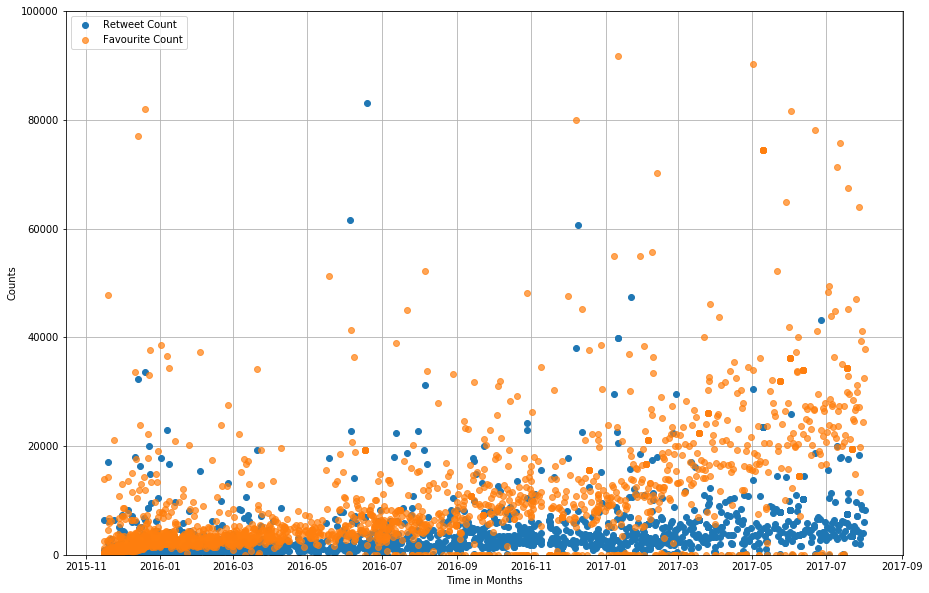

In [579]:
fig = plt.figure(figsize=(15,10))

plt.plot_date(dates,tam_df_rev['retweet_count'])
plt.plot_date(dates,tam_df_rev['favorite_count'],alpha=0.7)
plt.xlabel('Time in Months')
plt.ylabel('Counts')
plt.gca().legend(('Retweet Count','Favourite Count'))
plt.gca().set_ylim([0,100000])
plt.grid(b=None, which='major', axis='both')

It seems, that the Favourite Count will increase at all with progress of time. To proof this observation I will calculate the __Linear Regression__ for both, the Favourite Count and the Retweet Count over the time to verify it.  

### Code for Linear Regression and updated Visualisation

For this step it's crucial to remove any null or infinite values in the used dataset. Otherwise it will only produce nonsense data.

In [599]:
from scipy import stats

fav_slope, fav_intercept, r_value, p_value, std_err = stats.linregress(dates, tam_df_rev['favorite_count'])
ret_slope, ret_intercept, r_value, p_value, std_err = stats.linregress(dates, tam_df_rev['retweet_count'])

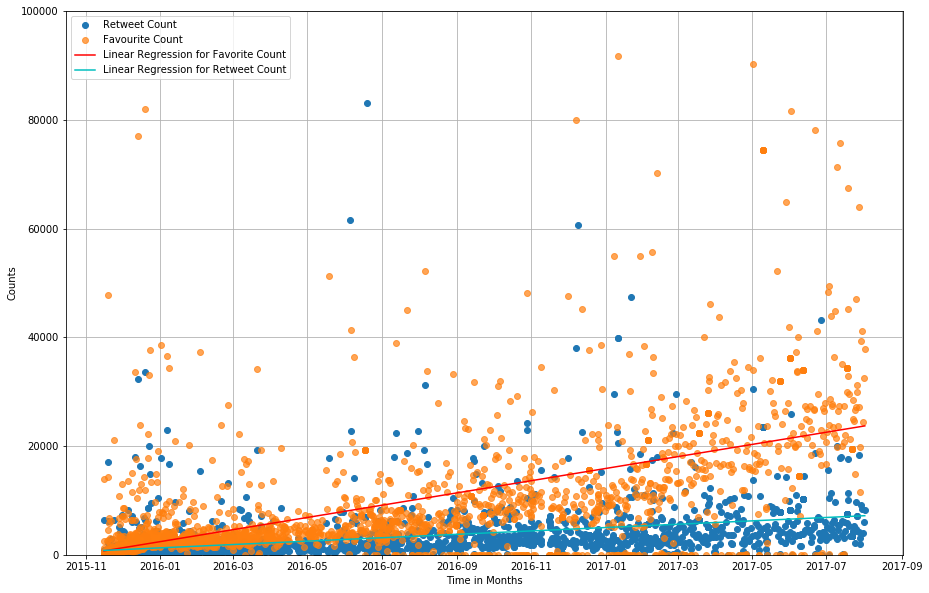

In [600]:
fig = plt.figure(figsize=(15,10))

plt.plot_date(dates,tam_df_rev['retweet_count'])
plt.plot_date(dates,tam_df_rev['favorite_count'],alpha=0.7)
plt.plot_date(dates,dates*fav_slope+fav_intercept,'r-')
plt.plot_date(dates,dates*ret_slope+ret_intercept,'c-')
plt.xlabel('Time in Months')
plt.ylabel('Counts')
plt.gca().legend(('Retweet Count','Favourite Count','Linear Regression for Favorite Count','Linear Regression for Retweet Count'))
plt.gca().set_ylim([0,100000])
plt.grid(b=None, which='major', axis='both')

Actually, there is an obvious increase for the Favourite account over time. It seems, that a quadratic polynomial regression would match the course of the dots in a  slightly more accurate way but I think it's goood enough to verify the first observation. 

### Evaluation
To explain the difference in increase we can ask for our own behaviour on social media like Twitter. The effort of will to like or favourise a post is much smaller than retweeting it and reveal a stronger commitment, i.e. a stronger opinion to the content of the post.

__Important:__ Overall we have to take into consideration a specific factor to correct the rating of "WeRateDogs" posts based on Retweet Counts and Favourite Counts if observing the whole timeline.